# 합성곱 신경망

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [19]:
# 사차원으로 만들기
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [20]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [21]:
model = keras.Sequential()

In [22]:
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [23]:
model.add(keras.layers.MaxPooling2D(2))

In [24]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [25]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# 모델 컴파일, 훈련
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
es = keras.callbacks.EarlyStopping(patience = 2)
result = model.fit(train_scaled, train_target, validation_data = (val_scaled, val_target), epochs = 20, callbacks = [es])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 47ms/step - accuracy: 0.7349 - loss: 0.7373 - val_accuracy: 0.8793 - val_loss: 0.3352
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.8679 - loss: 0.3654 - val_accuracy: 0.8929 - val_loss: 0.2882
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 87s 48ms/step - accuracy: 0.8892 - loss: 0.3068 - val_accuracy: 0.9069 - val_loss: 0.2636
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.8998 - loss: 0.2772 - val_accuracy: 0.9107 - val_loss: 0.2477
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 49ms/step - accuracy: 0.9081 - loss: 0.2454 - val_accuracy: 0.9112 - val_loss: 0.2435
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9208 - loss: 0.2178 - val_accuracy: 0.9150 - val_loss: 0.2338
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.9250 - loss: 0.2025 - val_accuracy: 0.9176 - val_loss: 0.2359
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9303 -

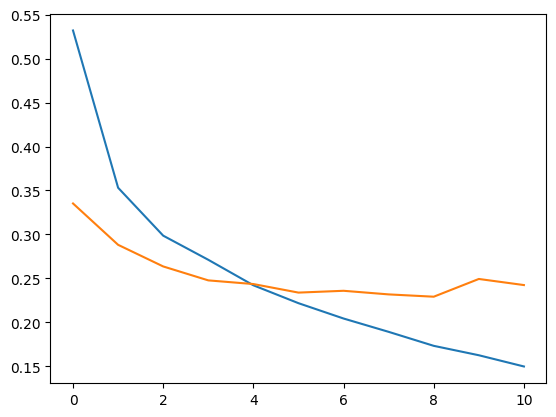

In [32]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [33]:
model.evaluate(val_scaled, val_target)

469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9215 - loss: 0.2526


[0.24236460030078888, 0.9214000105857849]

In [35]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9173 - loss: 0.2700


[0.2631303071975708, 0.9171000123023987]

In [ ]:
train